In [960]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [961]:
file_path = r'C:\work\Book1.xlsx'
df_patent = pd.read_excel(file_path)

In [962]:
df_patent.rename(columns={df_patent.columns[0]: 'Country'}, inplace=True)
df_patent.drop(df_patent.columns[[1, 2, 3]], axis=1, inplace=True)
indices_to_drop = [0, 1, 2, 3, 11, 36, 37, 39, 41, 43, 45, 47, 48, 59, 60, 61, 67, 94, 109, 120, 123, 129, 145, 155, 156, 175, 181, 183, 184]
df_patent.drop(indices_to_drop, inplace=True)

rows_to_change = [23, 80, 93, 116, 121, 136, 162, 168, 179]
column_to_change = 'Country'
new_names = ['Bolivia', 'Iran', 'Lao Peoples Democratic Republic', 'Netherlands', 'Macedonia', 'Moldova', 'Syria', 'Turkey', 'Venezuela']

for i, row_index in enumerate(rows_to_change):
    if row_index < 187:
        df_patent.at[row_index, column_to_change] = new_names[i]

df_patent = df_patent.sort_values(by='Country')

df_patent.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,13.0,19.0,25.0,24.0,18.0,5.0,12.0,24.0,21.0
5,Algeria,354.0,354.0,334.0,308.0,375.0,258.0,235.0,180.0,206.0,...,840.0,813.0,805.0,672.0,743.0,673.0,638.0,710.0,849.0,1118.0
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,6.0,11.0,15.0,8.0,11.0,8.0
7,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,120.0,110.0,85.0,86.0,80.0
8,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,15.0,10.0,12.0,8.0,10.0,NaN,3.0,8.0,6.0


In [963]:
GDP_path = r'C:\work\imf-dm-export-20231128.xls'
df_GDP = pd.read_excel(GDP_path)

In [964]:
df_GDP.rename(columns={df_GDP.columns[0]: 'Country'}, inplace=True)
indices_to_drop = [0, 1, 9, 20, 32, 34, 35, 39, 40, 41, 46, 54, 55, 62, 70, 71, 75, 92, 103, 107, 110, 111, 114, 120, 122, 127, 133, 141, 152, 161, 162, 166, 170, 171, 173, 175, 176, 190, 193, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230]
df_GDP.drop(indices_to_drop, inplace=True)
df_GDP = df_GDP.iloc[:, :-6]

rows_to_change = [13, 37, 63, 91, 94, 95, 129, 157, 182, 187, 192]
column_to_change = 'Country'
new_names = ['Bahamas', 'China', 'Gambia', 'Republic of Korea', 'Kyrgyzstan', 'Lao Peoples Democratic Republic', 'Macedonia', 'Slovakia', 'Turkey', 'United States of America', 'Viet Nam']

for i, row_index in enumerate(rows_to_change):
    if row_index < 200:
        df_GDP.at[row_index, column_to_change] = new_names[i]

df_GDP = df_GDP.sort_values(by='Country')

df_GDP.shape

(158, 44)

In [965]:
df_combined = pd.merge(df_patent, df_GDP, on='Country', how='inner', suffixes=('_patent', '_GDP'))
df_combined.set_index('Country', inplace=True)

df_combined.head()

,1980_patent,1981_patent,1982_patent,1983_patent,1984_patent,1985_patent,1986_patent,1987_patent,1988_patent,1989_patent,...,2013_GDP,2014_GDP,2015_GDP,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2021_GDP,2022_GDP
Country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1.8,2.2,3.3,3.8,4,2.1,-3.3,8.9,4.8
Algeria,354.0,354.0,334.0,308.0,375.0,258.0,235.0,180.0,206.0,204.0,...,2.8,3.8,3.7,3.2,1.4,1.2,1,-5.1,3.4,3.2
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.5,2.5,1.4,3.7,0.3,1.6,2,-11.2,8.3,8.8
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,4.8,0.9,-2.6,-0.2,-1.3,-0.7,-5.6,1.2,3
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.6,3.8,3.8,5.5,3.1,6.8,4.3,-17.5,6.6,8.5


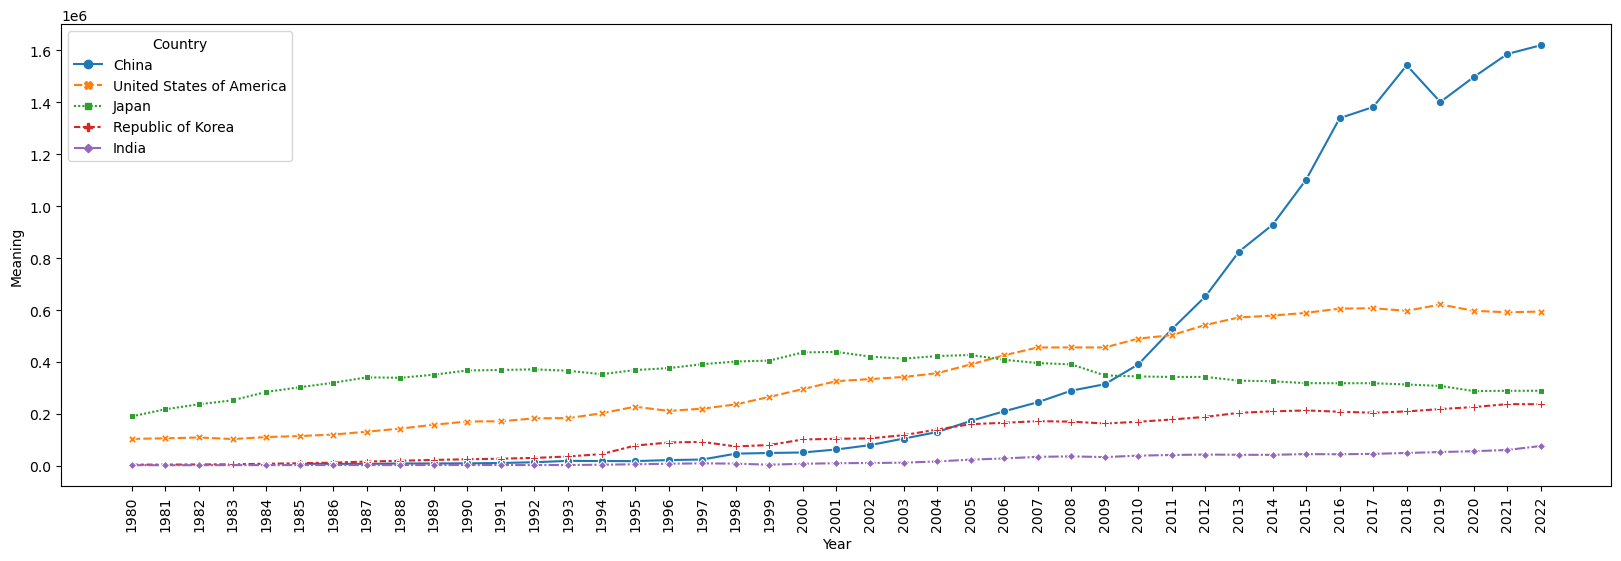

In [966]:
df_combined_transposed = df_combined.transpose()

# Sort the DataFrame based on values in the "2022_patent" column and select the top 5
top_5_countries_2022 = df_combined["2022_patent"].sort_values(ascending=False).head(5).index

# Sort the DataFrame based on the top 5 countries for 2022
df_combined_sorted = df_combined.loc[top_5_countries_2022].sort_values(by="2022_patent", ascending=False)

# Plotting
plt.figure(figsize=(20, 6))

# Plot the DataFrame using Seaborn's lineplot
sns.lineplot(data=df_combined_sorted.transpose()[:43], markers=True)

# Set custom x-axis tick labels from 1980 to 2022
years = list(range(1980, 2023))
plt.xticks(range(len(years)), years, rotation=90)

plt.xlabel('Year')
plt.ylabel('Meaning')

plt.show()

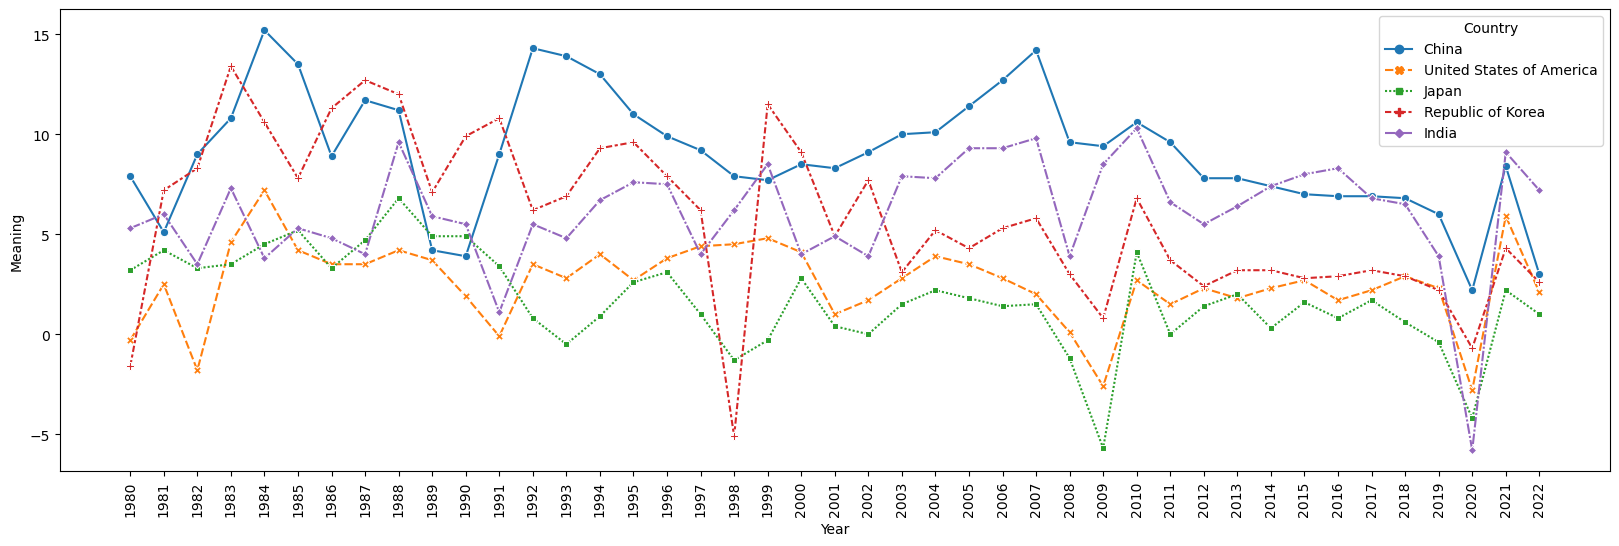

In [967]:
# Sort the DataFrame based on the top 5 countries for 2022
df_combined_sorted_gdp = df_combined.loc[top_5_countries_2022].sort_values(by="2022_patent", ascending=False)

# Plotting
plt.figure(figsize=(20, 6))

# Plot the DataFrame using Seaborn's lineplot
sns.lineplot(data=df_combined_sorted_gdp.transpose()[43:], markers=True)

# Set custom x-axis tick labels from 1980 to 2022
years = list(range(1980, 2023))
plt.xticks(range(len(years)), years, rotation=90)

plt.xlabel('Year')
plt.ylabel('Meaning')


plt.show()

In [968]:
df_combined.isnull().sum().head()

1980_patent    74
1981_patent    81
1982_patent    83
1983_patent    82
1984_patent    77
dtype: int64

In [969]:
df_top5=df_combined[df_combined['2022_patent']!=0].sort_values(by='2022_patent', ascending=False).head()

In [970]:
df_top5

,1980_patent,1981_patent,1982_patent,1983_patent,1984_patent,1985_patent,1986_patent,1987_patent,1988_patent,1989_patent,...,2013_GDP,2014_GDP,2015_GDP,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2021_GDP,2022_GDP
Country,,,,,,,,,,,,,,,,,,,,,
China,NaN,NaN,NaN,NaN,NaN,8558.0,8009.0,8059.0,9652.0,9659.0,...,7.8,7.4,7,6.9,6.9,6.8,6,2.2,8.4,3
United States of America,104329.0,106413.0,109625.0,103703.0,111284.0,115235.0,120916.0,131837.0,143836.0,158707.0,...,1.8,2.3,2.7,1.7,2.2,2.9,2.3,-2.8,5.9,2.1
Japan,191020.0,218261.0,237513.0,252685.0,284767.0,302995.0,320089.0,341095.0,339399.0,351207.0,...,2,0.3,1.6,0.8,1.7,0.6,-0.4,-4.2,2.2,1
Republic of Korea,5070.0,5303.0,5924.0,6394.0,8633.0,10585.0,12755.0,17057.0,20051.0,23315.0,...,3.2,3.2,2.8,2.9,3.2,2.9,2.2,-0.7,4.3,2.6
India,3024.0,2901.0,3076.0,NaN,3294.0,3475.0,3496.0,3508.0,3537.0,3648.0,...,6.4,7.4,8,8.3,6.8,6.5,3.9,-5.8,9.1,7.2


In [971]:
df_top5.dtypes.head()

1980_patent    float64
1981_patent    float64
1982_patent    float64
1983_patent    float64
1984_patent    float64
dtype: object

In [972]:
df_top5.describe()

,1980_patent,1981_patent,1982_patent,1983_patent,1984_patent,1985_patent,1986_patent,1987_patent,1988_patent,1989_patent,...,2013_patent,2014_patent,2015_patent,2016_patent,2017_patent,2018_patent,2019_patent,2020_patent,2021_patent,2022_patent
count,4.00000,4.000000,4.000000,3.000000,4.000000,5.000000,5.00000,5.000000,5.0000,5.000000,...,5.000000,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,75860.75000,83219.500000,89034.500000,120927.333333,101994.500000,88169.600000,93053.00000,100311.200000,103295.0000,109307.200000,...,394560.800000,417222.800000,4.538694e+05,5.032684e+05,5.116776e+05,5.425514e+05,5.205370e+05,5.332666e+05,5.531814e+05,5.635678e+05
std,90163.95539,102137.468768,110703.888196,124045.646495,131593.110191,128853.638524,136035.28867,144726.728838,144082.3593,149536.067764,...,308535.696693,345860.518502,4.125694e+05,5.096366e+05,5.276506e+05,5.931829e+05,5.336038e+05,5.731692e+05,6.079042e+05,6.191652e+05
min,3024.00000,2901.000000,3076.000000,6394.000000,3294.000000,3475.000000,3496.00000,3508.000000,3537.0000,3648.000000,...,43031.000000,42854.000000,4.565800e+04,4.505700e+04,4.658200e+04,5.005500e+04,5.362700e+04,5.677100e+04,6.157300e+04,7.706800e+04
25%,4558.50000,4702.500000,5212.000000,55048.500000,7298.250000,8558.000000,8009.00000,8059.000000,9652.0000,9659.000000,...,204589.000000,210292.000000,2.136940e+05,2.088300e+05,2.047750e+05,2.099920e+05,2.189750e+05,2.267590e+05,2.379980e+05,2.376330e+05
50%,54699.50000,55858.000000,57774.500000,103703.000000,59958.500000,10585.000000,12755.00000,17057.000000,20051.0000,23315.000000,...,328436.000000,325989.000000,3.187210e+05,3.183810e+05,3.184810e+05,3.135670e+05,3.079690e+05,2.884720e+05,2.892000e+05,2.895300e+05
75%,126001.75000,134375.000000,141597.000000,178194.000000,154654.750000,115235.000000,120916.00000,131837.000000,143836.0000,158707.000000,...,571612.000000,578802.000000,5.894100e+05,6.055710e+05,6.069560e+05,5.971410e+05,6.214530e+05,5.971720e+05,5.914730e+05,5.943400e+05
max,191020.00000,218261.000000,237513.000000,252685.000000,284767.000000,302995.000000,320089.00000,341095.000000,339399.0000,351207.000000,...,825136.000000,928177.000000,1.101864e+06,1.338503e+06,1.381594e+06,1.542002e+06,1.400661e+06,1.497159e+06,1.585663e+06,1.619268e+06


In [973]:
columns_to_convert = df_top5.columns[42:]
df_top5[columns_to_convert] = df_top5[columns_to_convert].astype(float)

In [974]:
df_top5.corr().head(5)

,1980_patent,1981_patent,1982_patent,1983_patent,1984_patent,1985_patent,1986_patent,1987_patent,1988_patent,1989_patent,...,2013_GDP,2014_GDP,2015_GDP,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2021_GDP,2022_GDP
1980_patent,1.000000,0.998194,0.996151,0.987300,0.986394,0.984159,0.983325,0.984233,0.989879,0.993140,...,-0.715171,-0.822855,-0.669877,-0.736019,-0.744012,-0.799349,-0.873367,-0.156108,-0.693763,-0.721730
1981_patent,0.998194,1.000000,0.999617,0.995822,0.994481,0.993013,0.992433,0.992972,0.996375,0.997941,...,-0.693395,-0.818444,-0.662152,-0.723342,-0.729757,-0.802922,-0.890081,-0.168505,-0.709032,-0.713059
1982_patent,0.996151,0.999617,1.000000,0.998181,0.997001,0.995891,0.995434,0.995808,0.998181,0.998970,...,-0.682991,-0.815849,-0.658349,-0.717121,-0.722789,-0.804044,-0.896983,-0.173276,-0.715705,-0.708717
1983_patent,0.987300,0.995822,0.998181,1.000000,0.999649,0.999114,0.998810,0.998932,0.999964,0.999793,...,-0.713303,-0.995486,-0.946724,-0.979499,-0.952129,-0.919867,-0.906565,-0.972397,-0.660891,-0.995709
1984_patent,0.986394,0.994481,0.997001,0.999649,1.000000,0.999908,0.999811,0.999762,0.999280,0.997921,...,-0.653364,-0.807316,-0.647690,-0.699172,-0.702667,-0.806035,-0.913960,-0.182425,-0.733804,-0.696160


In [975]:
numeric_data = df_combined.iloc[:, 43:].apply(pd.to_numeric, errors='coerce')

# Calculate Z-scores for each row
z_scores = np.abs(zscore(numeric_data, axis=1, nan_policy='omit'))

# Replace outliers with NaN using Z-scores
threshold = 0.3  # Adjust the threshold as needed
numeric_data[(z_scores > threshold)] = np.nan

# Combine the modified numeric data with the original DataFrame
df_combined.iloc[:, 43:] = numeric_data

# Display the updated DataFrame
df_combined.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4896\184203970.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_combined.iloc[:, 43:] = numeric_data


,1980_patent,1981_patent,1982_patent,1983_patent,1984_patent,1985_patent,1986_patent,1987_patent,1988_patent,1989_patent,...,2013_GDP,2014_GDP,2015_GDP,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2021_GDP,2022_GDP
Country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.8,2.2,3.3,3.8,4.0,2.1,NaN,NaN,4.8
Algeria,354.0,354.0,334.0,308.0,375.0,258.0,235.0,180.0,206.0,204.0,...,2.8,NaN,NaN,3.2,NaN,NaN,NaN,NaN,NaN,3.2
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.5,1.4,NaN,0.3,1.6,2.0,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.8,3.8,NaN,3.1,NaN,4.3,NaN,NaN,NaN


In [976]:
df_combined = df_combined.apply(pd.to_numeric, errors='coerce')

# Calculate the average meaning for each year
df_avg_meaning = df_combined.mean(axis=0)

# Create a DataFrame with the average meanings
df_avg_meaning = pd.DataFrame({'Year': df_avg_meaning.index, 'Average_Meaning': df_avg_meaning.values})

# Display the result
print(df_avg_meaning)

           Year  Average_Meaning
0   1980_patent      7142.702381
1   1981_patent      7993.675325
2   1982_patent      8369.720000
3   1983_patent      8262.460526
4   1984_patent      8285.641975
..          ...              ...
81     2018_GDP         3.215000
82     2019_GDP         3.001587
83     2020_GDP         2.950000
84     2021_GDP         4.055882
85     2022_GDP         3.606122

[86 rows x 2 columns]


In [977]:
df_1 = df_avg_meaning.iloc[:43].copy()

df_1['Year'] = df_1['Year'].str.replace('_patent', '')

df_1.set_index('Year', inplace=True)

df_1.rename(columns={'Average_Meaning': 'Patents'}, inplace=True)

df_1.head()

,Patents
Year,
1980,7142.702381
1981,7993.675325
1982,8369.720000
1983,8262.460526
1984,8285.641975


In [978]:
df_2 = df_avg_meaning.iloc[43:].copy()

df_2['Year'] = df_2['Year'].str.replace('_GDP', '')

df_2.set_index('Year', inplace=True)

df_2.rename(columns={'Average_Meaning': 'GDP_Growth'}, inplace=True)

df_2.head()

,GDP_Growth
Year,
1980,2.979310
1981,3.114286
1982,3.588000
1983,3.020588
1984,3.500000


In [979]:
df_new = pd.merge(df_1, df_2, left_index=True, right_index=True, how='inner')

df_new.head()

,Patents,GDP_Growth
Year,,
1980,7142.702381,2.979310
1981,7993.675325,3.114286
1982,8369.720000,3.588000
1983,8262.460526,3.020588
1984,8285.641975,3.500000


In [980]:
df_new.corr()

,Patents,GDP_Growth
Patents,1.000000,0.074202
GDP_Growth,0.074202,1.000000


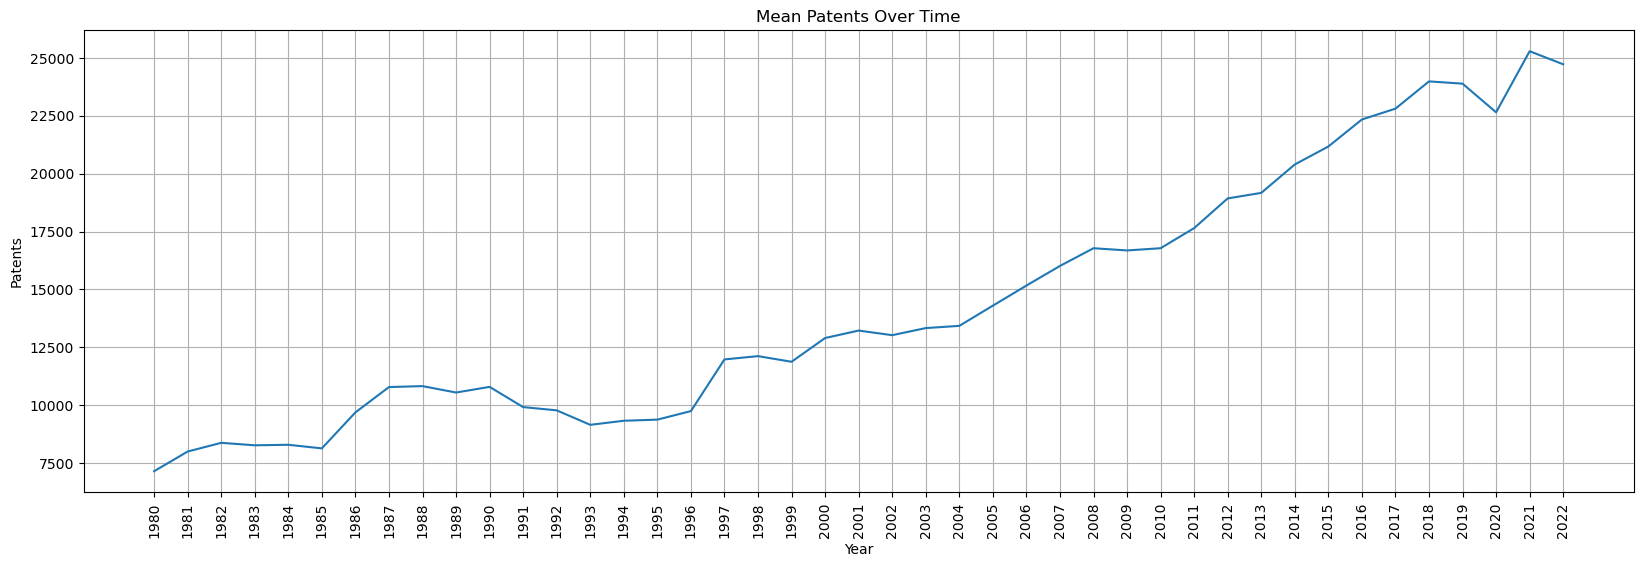

In [981]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_new['Patents'], markers=True)
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Mean Patents Over Time')
plt.show()

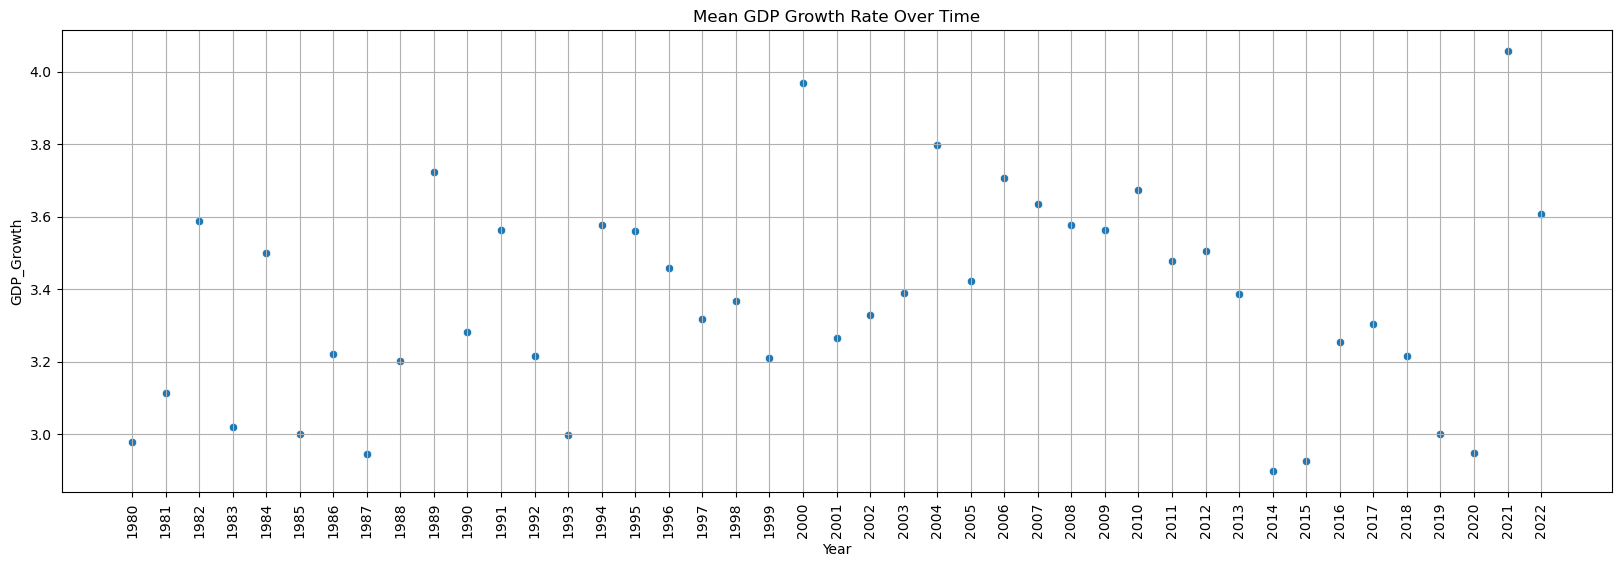

In [982]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_new['GDP_Growth'], markers=True)
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Mean GDP Growth Rate Over Time')
plt.show()

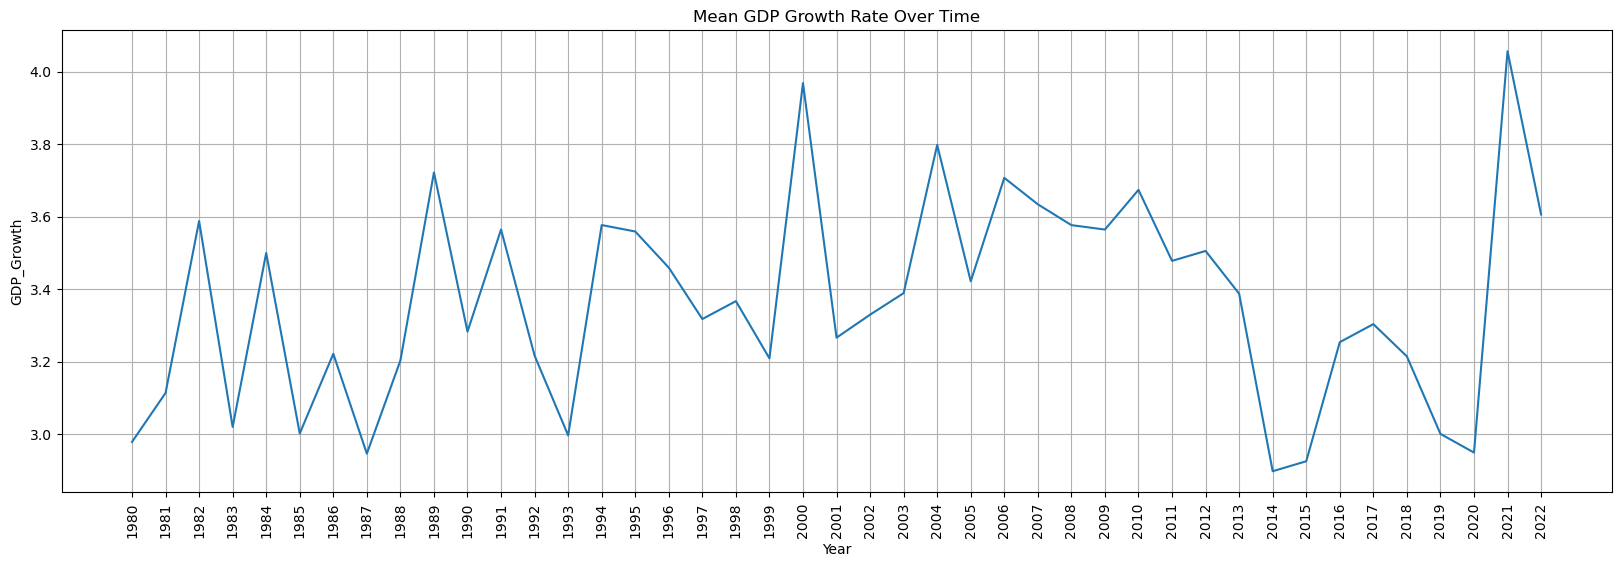

In [983]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_new['GDP_Growth'], markers=True)
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Mean GDP Growth Rate Over Time')
plt.show()